In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn as sk
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/content/roo_data - roo_data (1).csv', sep=',')
dataset.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [3]:
dataset.shape

(20000, 39)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.isnull().sum()

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [7]:
lst = dataset.columns

for i in lst:
  print('No of unique values in {}: {}'.format(i,(dataset[i].unique().size)))

No of unique values in Acedamic percentage in Operating Systems: 35
No of unique values in percentage in Algorithms: 35
No of unique values in Percentage in Programming Concepts: 35
No of unique values in Percentage in Software Engineering: 35
No of unique values in Percentage in Computer Networks: 35
No of unique values in Percentage in Electronics Subjects: 35
No of unique values in Percentage in Computer Architecture: 35
No of unique values in Percentage in Mathematics: 35
No of unique values in Percentage in Communication skills: 35
No of unique values in Hours working per day: 9
No of unique values in Logical quotient rating: 9
No of unique values in hackathons: 7
No of unique values in coding skills rating: 9
No of unique values in public speaking points: 9
No of unique values in can work long time before system?: 2
No of unique values in self-learning capability?: 2
No of unique values in Extra-courses did: 2
No of unique values in certifications: 9
No of unique values in worksh

In [8]:
lst = dataset.columns

for i in lst:
  print('No of unique values in {}: {}'.format(i,(dataset[i].unique())))

No of unique values in Acedamic percentage in Operating Systems: [69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]
No of unique values in percentage in Algorithms: [63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]
No of unique values in Percentage in Programming Concepts: [78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]
No of unique values in Percentage in Software Engineering: [87 60 84 67 79 62 81 91 83 90 71 74 63 86 70 75 92 93 72 78 85 64 82 65
 69 94 73 66 80 68 61 88 77 76 89]
No of unique values in Percentage in Computer Networks: [94 71 61 89 93 90 66 81 82 70 77 65 62 64 78 63 67 86 69 92 84 85 87 68
 83 60 88 74 75 80 91 72 76 73 79]
No of unique values in Percentage in Electronics Subjects: [94 70 81 73 89 84 93 63 69 82 72 67 65 61 88 91 74 90 80 79 75 62 76 77
 83 92 60 71 68 66 87 64 86 85 78]
No of

In [9]:
#combining values of target variable into 6
job_roles = {
    'Administrator' : ['Portal Administrator','Project Manager','Information Technology Manager','Network Security Administrator','Information Technology Auditor','Database Manager','Database Administrator','Quality Assurance Associate','Systems Security Administrator'],
    'Developer' : ['Database Developer','CRM Technical Developer','Mobile Applications Developer','Web Developer','Software Developer','Applications Developer'],
    'Analyst' : ['Business Systems Analyst','Business Intelligence Analyst','Programmer Analyst','Systems Analyst','E-Commerce Analyst','Information Security Analyst','CRM Business Analyst'],
    'Architects/Designers' : ['Design & UX','Solutions Architect','Data Architect','UX Designer'],
    'Engineers' : ['Software Systems Engineer','Network Engineer', 'Software Engineer', 'Technical Engineer', 'Network Security Engineer'],
    'Help/Support': ['Software Quality Assurance (QA) / Testing','Technical Services/Help Desk/Tech Support','Technical Support']
}

for i in job_roles:
    dataset.loc[dataset['Suggested Job Role'].isin(job_roles[i]), 'Suggested Job Role'] = i


In [10]:
#combining similar values in target variable.
print('Unique Values in Target Variable (Suggested Job Role): {}'.format(dataset['Suggested Job Role'].unique()))

Unique Values in Target Variable (Suggested Job Role): ['Developer' 'Administrator' 'Analyst' 'Engineers' 'Architects/Designers'
 'Help/Support']


In [11]:
#making list of columns which has only no/yes entries and encoding them to 0/1.
lst = ['can work long time before system?','worked in teams ever?','Introvert','In a Realtionship?','interested in games','Taken inputs from seniors or elders','olympiads','talenttests taken?','Extra-courses did','self-learning capability?']

for i in lst:
  dataset[i].replace({'yes': 1, 'no': 0}, inplace=True)

In [12]:
dataset.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,0,stubborn,Management,salary,hard worker,1,0,Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,1,gentle,Technical,salary,hard worker,0,1,Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,0,stubborn,Management,work,hard worker,0,1,Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,1,gentle,Management,work,smart worker,1,1,Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,0,stubborn,Management,work,hard worker,1,1,Analyst


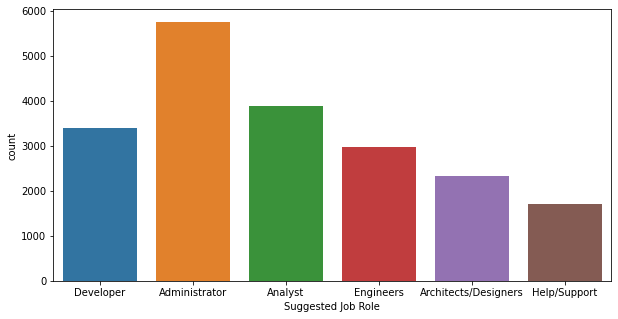

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(dataset['Suggested Job Role'])
plt.show()

In [14]:
to_encode = ['certifications','workshops', 'reading and writing skills', 'memory capability score','Interested subjects', 
             'interested career area', 'Job/Higher Studies?','Type of company want to settle in?','Interested Type of Books', 
             'Salary Range Expected', 'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work', 'hard/smart worker', 
             'Suggested Job Role']

for i in to_encode:
  dataset[i] = dataset[i].astype('category').cat.codes

In [15]:
dataset.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,21,1,0,1,0,0,0,1,0,3
1,78,62,73,60,71,70,73,84,91,12,...,5,1,1,0,1,0,0,0,1,0
2,71,86,91,87,61,81,72,72,94,11,...,29,0,0,1,0,1,0,0,1,0
3,76,87,60,84,89,73,62,88,69,7,...,23,0,1,0,0,1,1,1,1,0
4,92,62,90,67,71,89,73,71,73,4,...,7,1,0,1,0,1,0,1,1,1


#b)  Divide it into training and testing sets..

In [16]:
#seperating dependent and independent variable and making X dataframe having all independent variables and Y dataframe having all dependent variables.
X=dataset.drop(['Suggested Job Role'], axis=1)
Y=dataset['Suggested Job Role']
print(X.shape)
print(Y.shape)

(20000, 38)
(20000,)


In [17]:
scx = StandardScaler()
X_scaled = scx.fit_transform(X)

In [18]:
#splitting the dataset into training dataset and test dataset
#0.3 i.e. 30% of the data is test data. and 0.7 i.e. 70% of the data = training data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

In [19]:
print("Shape of X_train and X_test: {}, {}".format(X_train.shape,X_test.shape))
print("Shape of Y_train and Y_test: {}, {}".format(Y_train.shape,Y_test.shape))

Shape of X_train and X_test: (14000, 38), (6000, 38)
Shape of Y_train and Y_test: (14000,), (6000,)


In [20]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'logistic',solver='sgd',random_state=1)
model.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(110,), random_state=5,
              solver='sgd')

In [21]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [22]:
acc= accuracy_score(Y_test, test_pred)
print('Value of Accuracy: {}%'.format(acc*100))

Value of Accuracy: 29.099999999999998%


In [74]:
matrix = confusion_matrix(Y_test, test_pred)
print('Confusion Matrix: \n\n',matrix )

Confusion Matrix: 

 [[1746    0    0    0    0    0]
 [1177    0    0    0    0    0]
 [ 661    0    0    0    0    0]
 [1036    0    0    0    0    0]
 [ 868    0    0    0    0    0]
 [ 512    0    0    0    0    0]]


In [75]:
print("Classwise Accuracies: ")
print()
arr = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(arr)):
  x = round(arr[i]*100, 3)
  print('Accuracy of class {}: {}%'.format(i,x))

Classwise Accuracies: 

Accuracy of class 0: 100.0%
Accuracy of class 1: 0.0%
Accuracy of class 2: 0.0%
Accuracy of class 3: 0.0%
Accuracy of class 4: 0.0%
Accuracy of class 5: 0.0%


In [76]:
split = [0.4,0.3,0.1]
acc = []

for i in split:
  X_train_analyse, X_test_analyse, Y_train_analyse, Y_test_analyse = train_test_split(X_scaled, Y, test_size=i, random_state=0)
  model_analyse = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'logistic',solver='sgd',random_state=1)
  model_analyse.fit(X_train_analyse, Y_train_analyse)
  pred = model_analyse.predict(X_test_analyse)
  acc_score= accuracy_score(Y_test_analyse, pred)
  acc.append(acc_score)

In [77]:
lst=['60-40','70-30','90-10']
for i in range(3):
  print("Accuracy of model with {} train-test split: {}%".format(lst[i],(acc[i]*100)))

Accuracy of model with 60-40 train-test split: 29.175%
Accuracy of model with 70-30 train-test split: 29.099999999999998%
Accuracy of model with 90-10 train-test split: 29.299999999999997%
